{'dk': 24021133506, 'se': 65074283493, 'no': 44369180306, 'fi': 32100084252}


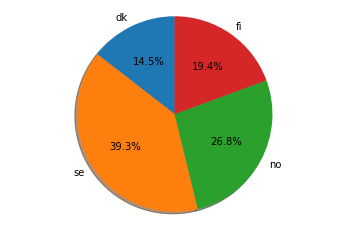

In [32]:
#Exercise from Cloudy Addition

#Hvilket land i Norden (Danmark, Finland, Island, Norge og Sverige) har samlet set flest 
#‘Video Views’ beregnet ud fra hvert lands top 250? Lav et pie chart, som viser fordelingen.
#Brug URLs: “[...]/top/country/{countryCode}/mostviewed”

base_url = "https://socialblade.com/youtube/top/"

import bs4
import requests
import re
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

countries = ["dk", "se", "no", "fi"]

country_views = {}

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}

executor = ThreadPoolExecutor(len(countries))

def scrape(country):
    r = requests.get('https://socialblade.com/youtube/top/country/'+country+'/mostviewed', headers=headers)
    r.raise_for_status()

    soup = bs4.BeautifulSoup(r.text, 'html.parser')

    divs = soup.find_all('div', attrs={'style': 'float: left; width: 150px;'})
    
    counter = 0
    for div in divs:
        spans = div.select('span')
        for span in spans:
            number = re.sub('[,-]', '', span.text)
            if number:
                counter += int(number)
    country_views[country]=counter

for country in countries:
    executor.submit(scrape(country))

print(country_views)

labels = country_views.keys()
amounts = country_views.values()

fig1, ax1 = plt.subplots()
ax1.pie(amounts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

{'autos': 79816947613, 'comedy': 351982476689, 'education': 612873287708, 'entertainment': 1655617170476, 'film': 663649600931, 'games': 523790108023, 'howto': 265331616522, 'made-for-kids': 1376114934680, 'music': 1741632722280, 'news': 429954619861, 'nonprofit': 34004761376, 'people': 349282623007, 'animals': 86533795352, 'tech': 112025448524, 'shows': 353914851, 'sports': 228583311280, 'travel': 72819251264}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

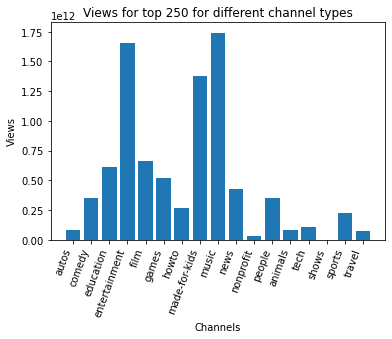

In [38]:
#Hvilken ‘Channel Type’ har samlet set flest uploads ud fra top 250 for hver ‘Channel Type’?
#Vis fordelingen af uploads pr. ‘Channel Type’ med et bar plot.
#Brug URLs: [...]/top/category/{channelType}

channel_types = ['autos', 'comedy', 'education', 'entertainment', 'film', 'games', 'howto', 'made-for-kids',
                'music', 'news', 'nonprofit', 'people', 'animals', 'tech', 'shows', 'sports', 'travel']

channel_views = {}

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}

executor = ThreadPoolExecutor(len(channel_types))

def scrape(channel):
    r = requests.get('https://socialblade.com/youtube/top/category/'+channel, headers=headers)
    r.raise_for_status()

    soup = bs4.BeautifulSoup(r.text, 'html.parser')

    divs = soup.find_all('div', attrs={'style': 'float: left; width: 150px;'})
    
    counter = 0
    for div in divs:
        spans = div.select('span')
        for span in spans:
            number = re.sub('[,-]', '', span.text)
            if number:
                counter += int(number)
    channel_views[channel]=counter

for channel in channel_types:
    executor.submit(scrape(channel))

print(channel_views)

views = channel_views.values()


plt.bar(channel_types, views)
plt.title('Views for top 250 for different channel types')
plt.xlabel('Channels')
plt.ylabel('Views')
plt.xticks(rotation=70, horizontalalignment='right')


In [66]:
#Hvordan er fordelingen af ‘Channel Type’ på danmarks top 250 youtube kanaler fordelt på most subscribers?
#Vis dette med et bar plot.
#Brug URLs: [...]/top/country/{countryCode}/mostsubscribed og: /user/{channelName} for hver kanal på listen

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}

channel_types_in_top_250 = {}
channel_names = []

r = requests.get('https://socialblade.com/youtube/top/country/dk/mostsubscribed', headers=headers)
r.raise_for_status()

soup = bs4.BeautifulSoup(r.text, 'html.parser')

divs = soup.find_all('div', attrs={'style': 'float: left; width: 350px; line-height: 25px;'})
    
for div in divs:
    for a in div.find_all('a', href=True):
        channel_names.append(a['href'])


def scrape(channel):
    print(channel)
    r = requests.get('https://socialblade.com'+channel, headers=headers)
    r.raise_for_status()

    soup = bs4.BeautifulSoup(r.text, 'html.parser')

    channel_type = soup.find(id='youtube-user-page-channeltype')
    print(channel_type.text)
    chan = channel_types_in_top_250.get(channel_type)
    if chan == None:
        channel_types_in_top_250[channel_type] = 1
    else: 
        channel_types_in_top_250[channel_type] += 1
    
executor = ThreadPoolExecutor(len(channel_names))

for channel in channel_names:
    executor.submit(scrape(channel))

print(channel_types_in_top_250)


HTTPError: 403 Client Error: Forbidden for url: https://socialblade.com/youtube/top/country/dk/mostsubscribed